In [ ]:
Future_Sales_Prediction_with_Marketing_Expense_Forecasti

In [2]:
#import the important packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [8]:
data = pd.read_csv('Sales-and-Marketing.csv')
data

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15
5,Jun-11,591,548.74
6,Jul-11,651,650.21
7,Aug-11,654,777.51
8,Sep-11,509,547.11
9,Oct-11,437,382.81


In [9]:
data.shape

(48, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
data.columns = [i.replace(' ','_') for i in data.columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time_Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing_Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [13]:
data.head()

,Time_Period,Sales,Marketing_Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [14]:
#converting the object type date to datetime type
data['Time_Period'] = pd.to_datetime(data.Time_Period, format='%b-%y')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time_Period        48 non-null     datetime64[ns]
 1   Sales              48 non-null     int64         
 2   Marketing_Expense  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 KB


In [16]:
data.head()

,Time_Period,Sales,Marketing_Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


**Setting the time data column as the index.**

In [17]:
data.set_index(data.Time_Period, inplace=True)

In [18]:
data.head()

,Time_Period,Sales,Marketing_Expense
Time_Period,,,
2011-01-01,2011-01-01,397,486.64
2011-02-01,2011-02-01,400,501.80
2011-03-01,2011-03-01,498,437.09
2011-04-01,2011-04-01,536,565.16
2011-05-01,2011-05-01,596,744.15


In [19]:
data['year'] = data.Time_Period.dt.year
data['month'] = data.Time_Period.dt.month

In [20]:
data.head(10)

,Time_Period,Sales,Marketing_Expense,year,month
Time_Period,,,,,
2011-01-01,2011-01-01,397,486.64,2011,1
2011-02-01,2011-02-01,400,501.80,2011,2
2011-03-01,2011-03-01,498,437.09,2011,3
2011-04-01,2011-04-01,536,565.16,2011,4
2011-05-01,2011-05-01,596,744.15,2011,5
2011-06-01,2011-06-01,591,548.74,2011,6
2011-07-01,2011-07-01,651,650.21,2011,7
2011-08-01,2011-08-01,654,777.51,2011,8
2011-09-01,2011-09-01,509,547.11,2011,9


In [21]:
Sales = data.Sales
Sales

Time_Period
2011-01-01    397
2011-02-01    400
2011-03-01    498
2011-04-01    536
2011-05-01    596
2011-06-01    591
2011-07-01    651
2011-08-01    654
2011-09-01    509
2011-10-01    437
2011-11-01    406
2011-12-01    470
2012-01-01    428
2012-02-01    423
2012-03-01    507
2012-04-01    536
2012-05-01    610
2012-06-01    609
2012-07-01    687
2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
2013-01-01    454
2013-02-01    455
2013-03-01    568
2013-04-01    610
2013-05-01    706
2013-06-01    661
2013-07-01    767
2013-08-01    783
2013-09-01    583
2013-10-01    513
2013-11-01    481
2013-12-01    567
2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Time_Period'>

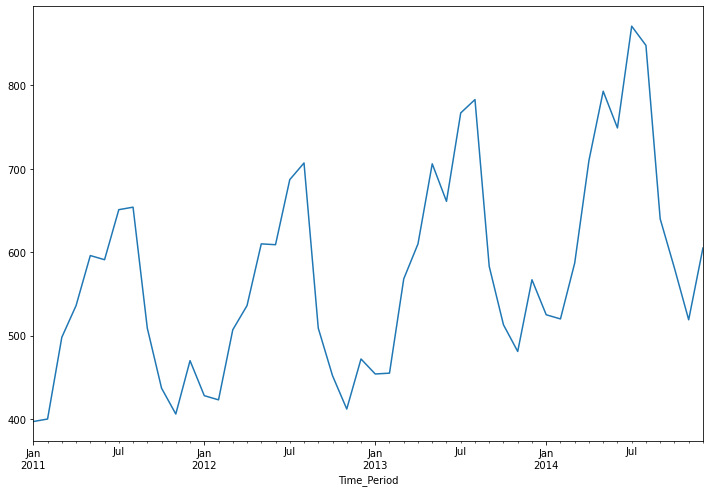

In [23]:
Sales.plot(figsize = (12,8))

**We can see that the time series data we have contains an increasing trend and also the month over month seasonality.**

# Checking the trend in the Time Series data.

In [24]:
pd.pivot_table(data = data, index = 'year', columns = 'month', values = 'Sales')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,397,400,498,536,596,591,651,654,509,437,406,470
2012,428,423,507,536,610,609,687,707,509,452,412,472
2013,454,455,568,610,706,661,767,783,583,513,481,567
2014,525,520,587,710,793,749,871,848,640,581,519,605


<AxesSubplot:xlabel='year'>

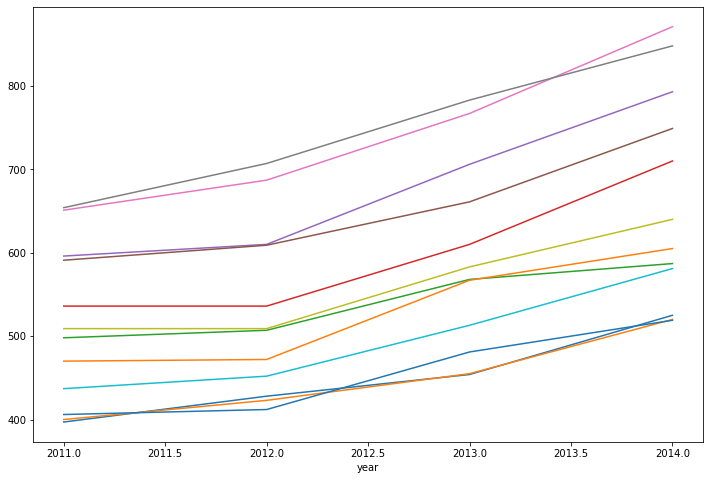

In [25]:
#Long to wide data
pd.pivot_table(data = data, index = 'year', columns = 'month', values = 'Sales').plot(legend=False, figsize = (12,8))

# Checking the seasonality in the Time series data.

In [27]:
pd.pivot_table(data = data, index = 'month', columns = 'year', values = 'Sales')

year,2011,2012,2013,2014
month,,,,
1,397,428,454,525
2,400,423,455,520
3,498,507,568,587
4,536,536,610,710
5,596,610,706,793
6,591,609,661,749
7,651,687,767,871
8,654,707,783,848
9,509,509,583,640


<AxesSubplot:xlabel='month'>

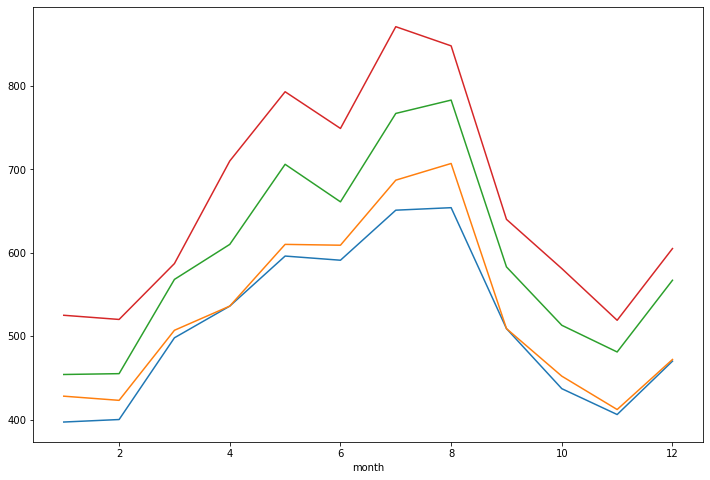

In [26]:
pd.pivot_table(data = data, index = 'month', columns = 'year', values = 'Sales').plot(legend=False, figsize = (12,8))

# Using the Decomposition of Time Series data to work on the Seasonality of data.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#We will be using the multiplicative model since we have both trend and seasonality in the data

In [29]:
decom = seasonal_decompose(Sales, model='multiplicative')

In [30]:
decomposed = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(24)
decomposed.columns = ['Actual', 'Trend', 'Seasonality', 'Irregular']
decomposed

,Actual,Trend,Seasonality,Irregular
Time_Period,,,,
2011-01-01,397.0,NaN,0.819408,NaN
2011-02-01,400.0,NaN,0.806180,NaN
2011-03-01,498.0,NaN,0.953387,NaN
2011-04-01,536.0,NaN,1.052744,NaN
2011-05-01,596.0,NaN,1.190072,NaN
2011-06-01,591.0,NaN,1.135020,NaN
2011-07-01,651.0,513.375000,1.282917,0.988434
2011-08-01,654.0,515.625000,1.298403,0.976865
2011-09-01,509.0,516.958333,0.965115,1.020195


# Seasonal-Trend decomposition using LOESS (STL):

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [34]:
data.describe()

,Sales,Marketing_Expense,year,month
count,48.000000,48.000000,48.000000,48.000000
mean,574.854167,575.762500,2012.500000,6.500000
std,122.498109,153.079988,1.129865,3.488583
min,397.000000,300.290000,2011.000000,1.000000
25%,478.750000,442.302500,2011.750000,3.750000
50%,567.500000,567.730000,2012.500000,6.500000
75%,651.750000,671.995000,2013.250000,9.250000
max,871.000000,980.160000,2014.000000,12.000000


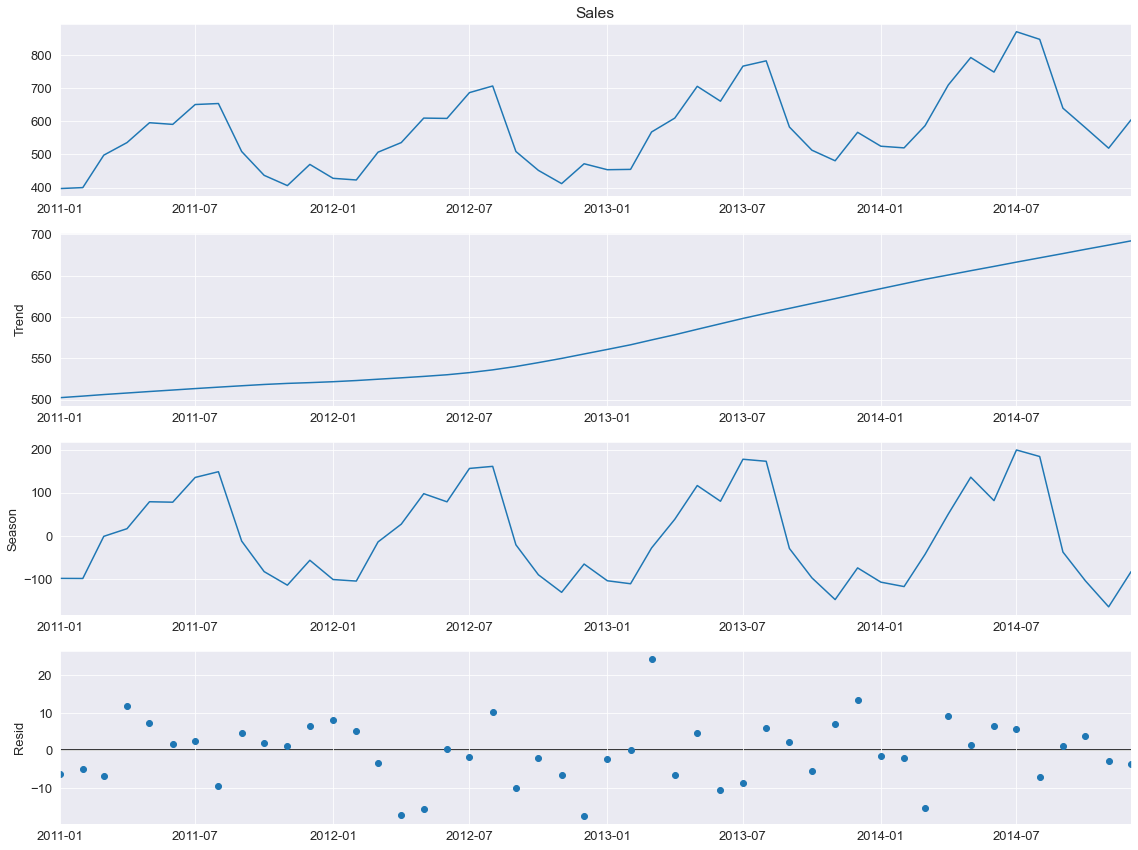

In [35]:
from statsmodels.tsa.seasonal import STL

stl = STL(Sales, seasonal=13)
res = stl.fit()
fig = res.plot()

In [88]:
Case = data[['Sales','Marketing_Expense']]
Case.head()

,Sales,Marketing_Expense
Time_Period,,
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


# Building a SARIMA model for forecasting:

In [47]:
from statsmodels.tsa.stattools import acf, pacf_ols

In [89]:
Case.Sales

Time_Period
2011-01-01    397
2011-02-01    400
2011-03-01    498
2011-04-01    536
2011-05-01    596
2011-06-01    591
2011-07-01    651
2011-08-01    654
2011-09-01    509
2011-10-01    437
2011-11-01    406
2011-12-01    470
2012-01-01    428
2012-02-01    423
2012-03-01    507
2012-04-01    536
2012-05-01    610
2012-06-01    609
2012-07-01    687
2012-08-01    707
2012-09-01    509
2012-10-01    452
2012-11-01    412
2012-12-01    472
2013-01-01    454
2013-02-01    455
2013-03-01    568
2013-04-01    610
2013-05-01    706
2013-06-01    661
2013-07-01    767
2013-08-01    783
2013-09-01    583
2013-10-01    513
2013-11-01    481
2013-12-01    567
2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Name: Sales, dtype: int64

In [90]:
#Auto-Correlation Factor
acf(Case.Sales)

array([ 1.        ,  0.75474789,  0.43539828,  0.15886856, -0.0732785 ,
       -0.26878307, -0.41780717, -0.26554602, -0.06647578,  0.1131385 ,
        0.27805268,  0.47016246,  0.6151414 ,  0.42908209,  0.19030166,
       -0.02860688, -0.19240823])

In [91]:
len(acf(Case.Sales))

17

# Augmented Dickey Fuller Test.

***Null hypothesis: Time Series data is not stationary.***
    
***Alternate hypothesis : Time Series data is stationary.***
    
***Confidence interval : 95%***
    
***p-value : 0.05***

In [51]:
import statsmodels.tsa.api as smt

**Checking if the data is stationary or not.**

In [92]:
# Dickey-Fuller test can also help with finding whther my series is stationary of not
from statsmodels.tsa.stattools import adfuller
adfuller(Case.Sales)

(1.4343335103140358,
 0.997264666247424,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 374.79666100289796)

**p value is high 0.9989 means we cannot reject the null hypothesis - Time Series is NOT stationary.**

**Given p value here is 0.9989 it means that our series is not stationary.**

**We would perform log transformation :**

In [93]:
Case_ln = np.log(Case.Sales)
adfuller(Case_ln)

(0.8974547509318834,
 0.9930570200819626,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 -101.66145329030988)

***Log transformation again giving us p-value of 0.9986 so we still cannot reject the null hypothesis and hence we can say***

***our time data series is not stationary.***

***We will try the DIFFERENCING technique to make our data stationary.***

In [94]:
adfuller(Case.Sales.diff(1).dropna())

(-7.015650419745926,
 6.743731035462132e-10,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 361.3167752934369)

**p-value <<<< 0.05, and hence we can now say that with one Differencing d = 1, we get a stationary data.**

In [ ]:
# Yt (outcome variable) = Sales
# d = 1

In [95]:
sales_diff = Case.Sales.diff(1).dropna()

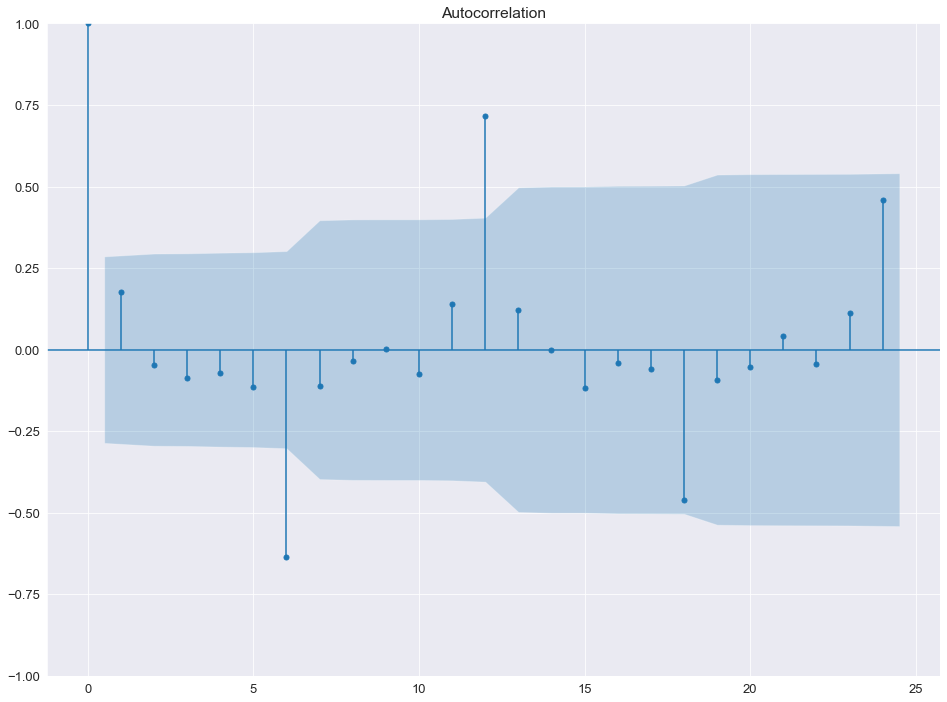

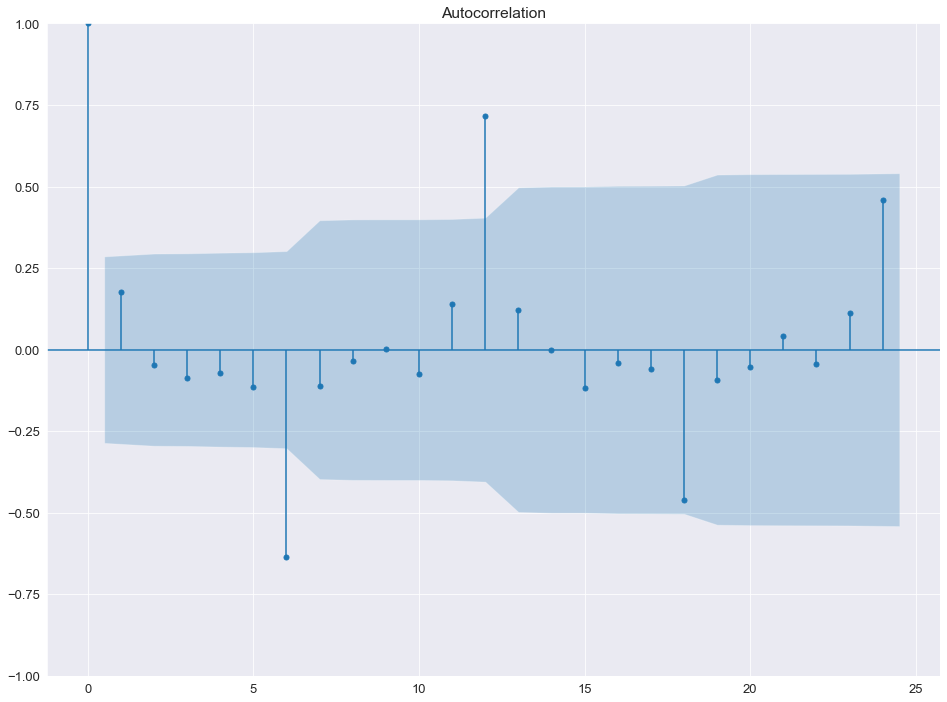

In [96]:
# Getting a value for Partial auto correlation factor.
smt.graphics.plot_acf(sales_diff, lags = 24)

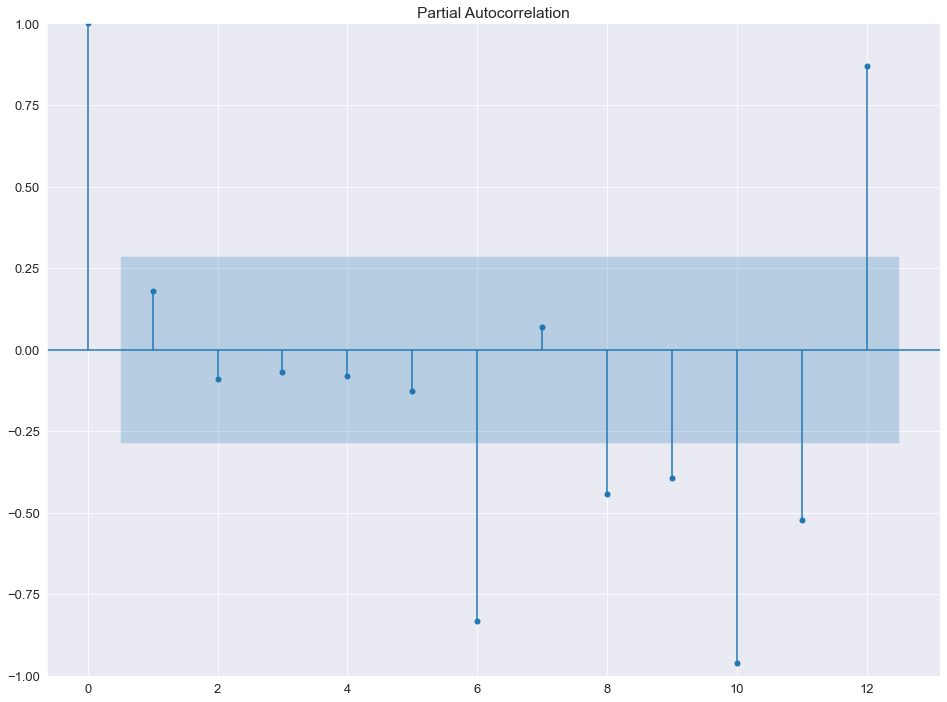

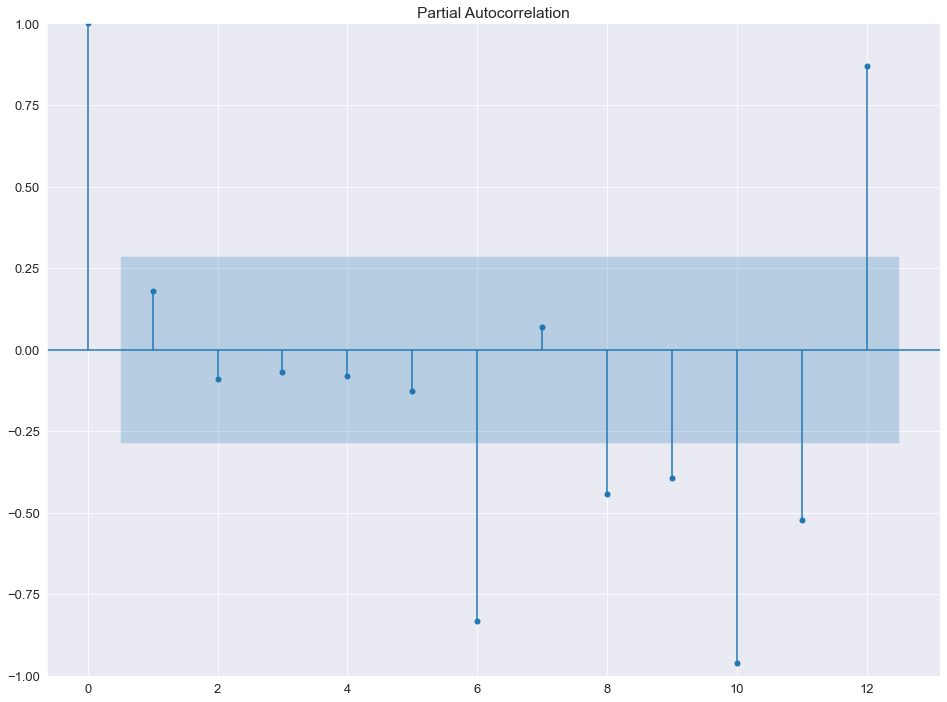

In [97]:
smt.graphics.plot_pacf(sales_diff, lags = 12, method='ols')

In [98]:
Case['MS_Lag1'] = Case.Marketing_Expense.shift(1)
Case['MS_Lag2'] = Case.Marketing_Expense.shift(2)
Case['MS_Lag3'] = Case.Marketing_Expense.shift(3)
Case['MS_Lag4'] = Case.Marketing_Expense.shift(4)

C:\Users\Toshiba\AppData\Local\Temp/ipykernel_8200/2627004132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Case['MS_Lag1'] = Case.Marketing_Expense.shift(1)
C:\Users\Toshiba\AppData\Local\Temp/ipykernel_8200/2627004132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Case['MS_Lag2'] = Case.Marketing_Expense.shift(2)


In [99]:
Case

,Sales,Marketing_Expense,MS_Lag1,MS_Lag2,MS_Lag3,MS_Lag4
Time_Period,,,,,,
2011-01-01,397,486.64,NaN,NaN,NaN,NaN
2011-02-01,400,501.80,486.64,NaN,NaN,NaN
2011-03-01,498,437.09,501.80,486.64,NaN,NaN
2011-04-01,536,565.16,437.09,501.80,486.64,NaN
2011-05-01,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,509,547.11,777.51,650.21,548.74,744.15


In [101]:
Case['2011-05-01':].corr()

,Sales,Marketing_Expense,MS_Lag1,MS_Lag2,MS_Lag3,MS_Lag4
Sales,1.000000,0.807838,0.585169,0.262011,-0.056909,-0.257012
Marketing_Expense,0.807838,1.000000,0.626329,0.380395,0.140597,-0.130755
MS_Lag1,0.585169,0.626329,1.000000,0.622385,0.380459,0.145967
MS_Lag2,0.262011,0.380395,0.622385,1.000000,0.625423,0.398619
MS_Lag3,-0.056909,0.140597,0.380459,0.625423,1.000000,0.634986
MS_Lag4,-0.257012,-0.130755,0.145967,0.398619,0.634986,1.000000


**We will consider Marketing_Expense , MS_Lag1, MS_Lag2, as there correlation is high with respect to the Sales.**

In [102]:
X = Case['2011-05-01':][['Marketing_Expense', 'MS_Lag1', 'MS_Lag2']]
time_series = Case['2011-05-01':].Sales

In [ ]:
#p=1, q=1, d=1, Yt=Sales, SARIMA, P=1, D=0, Q =1

In [103]:
import statsmodels.api as sm

In [118]:
model = sm.tsa.statespace.SARIMAX(time_series,
                                      exog = X,
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()



E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1069.926
Date:                            Thu, 10 Nov 2022   AIC                           2155.852
Time:                                    06:38:26   BIC                           2166.791
Sample:                                05-01-2011   HQIC                          2159.278
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing_Expense     0.2817   7507.769   3.75e-05      1.000   -1.47e+04    1.47e+04
MS_Lag1       

In [143]:
X.head()

,Marketing_Expense,MS_Lag1,MS_Lag2
Time_Period,,,
2011-05-01,744.15,565.16,437.09
2011-06-01,548.74,744.15,565.16
2011-07-01,650.21,548.74,744.15
2011-08-01,777.51,650.21,548.74
2011-09-01,547.11,777.51,650.21


In [122]:
model=sm.tsa.statespace.SARIMAX(Case['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\PYTHON SETUP\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Time_Period'>

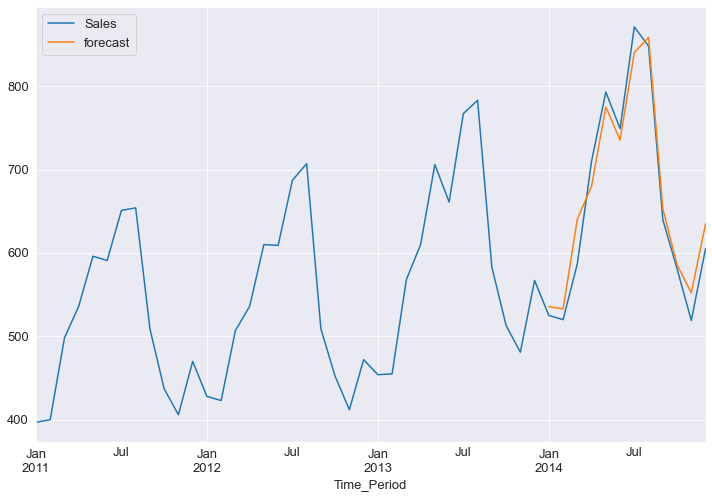

In [128]:
Case['forecast']=results.predict(start=36,end=48,dynamic=True)
Case[['Sales','forecast']].plot(figsize=(12,8))

# Making a NAN value future dataset.

In [137]:
from pandas.tseries.offsets import DateOffset
dates=[Case.index[-1]+ DateOffset(months=x)for x in range(0,13)]

In [138]:
dates=pd.DataFrame(index=dates[1:],columns=Case.columns)

In [139]:
dates 

,Sales,Marketing_Expense,MS_Lag1,MS_Lag2,MS_Lag3,MS_Lag4,forecast
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***To make the forecasted values, we need to concat the new dates data to the Case data.***

In [140]:
Case = pd.concat([Case,dates])

In [150]:
results.forecast(steps = 12, exog = dates)

2015-01-01    575.322440
2015-02-01    574.044420
2015-03-01    650.054427
2015-04-01    767.439745
2015-05-01    852.497466
2015-06-01    803.789109
2015-07-01    925.216520
2015-08-01    903.975461
2015-09-01    701.627929
2015-10-01    638.882334
2015-11-01    581.436866
2015-12-01    670.426899
Freq: MS, Name: predicted_mean, dtype: float64

E:\PYTHON SETUP\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

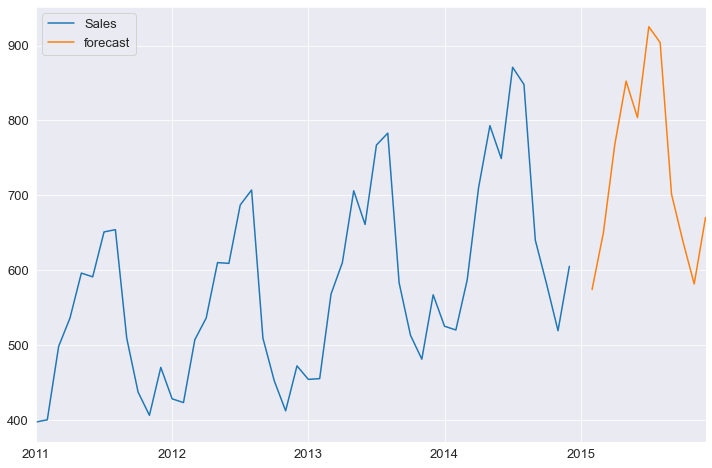

In [141]:
Case['forecast'] = results.predict(start = 49, end = 60, dynamic= True)  
Case[['Sales', 'forecast']].plot(figsize=(12, 8))